# Benchmarking functions in R3BP

Yuri Shimane, 2021.07.08

In [1]:
using LinearAlgebra
using DifferentialEquations
using BenchmarkTools
using Plots

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
include("../R3BP/src/R3BP.jl")

Main.R3BP

In [4]:
params = R3BP.get_cr3bp_param(399, 301)
mu = params.mu
println("mu: $mu")
lp = R3BP.lagrangePoints(mu)

# initial condition of halo
X0 = [1.176924090973164, 0.0, -0.060210863312217, 0.0, -0.173836346247689, 0.0]
T = 3.385326412831325

# parameters for manifolds
stability = true
tf = -10.0

mu: 0.012150584269940354


-10.0

In [5]:
outsim, wm = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, xdir="negative", verbosity=1);

========== Manifold Setting ==========
   xdir: negative
   Stable: true
Linear stability ν = 460.9383723688316
Using linear perturbation ϵ = 2.6014568158168576e-8


In [6]:
outsim2, wm2 = R3BP.get_manifold(mu, X0, T, tf, stability; wm=wm, verbosity=1);

========== Manifold Setting ==========
   xdir: positive
   Stable: true
Warm-starting EnsembleProblem


In [7]:
outsim3, wm3 = R3BP.get_manifold(wm, mu, 6, 1.1tf);

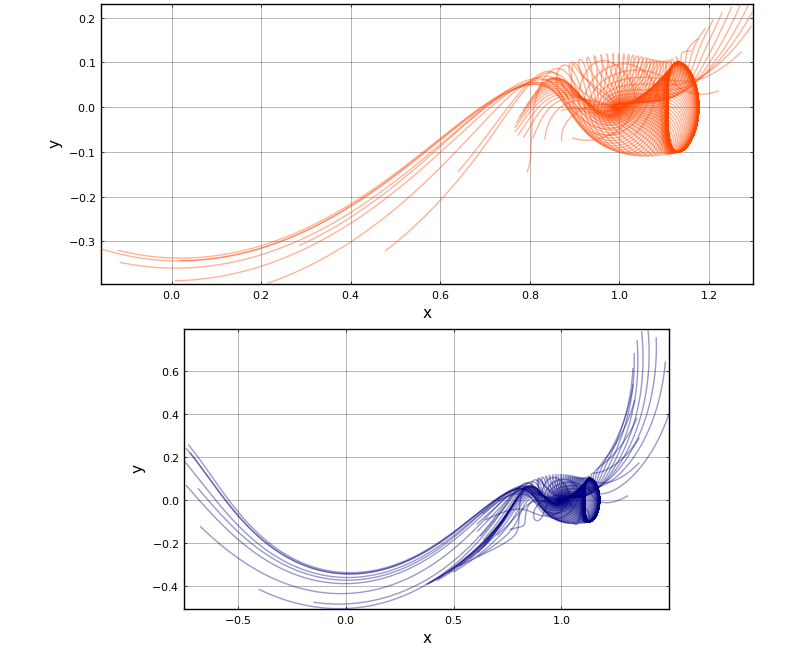

In [8]:
p1 = plot(outsim, linealpha=0.4, vars=(1,2), flip=false, aspect_ratio=:equal, size=(800,650), c=:orangered,
     frame_style=:box, gridalpha=0.4, xlabel="x", ylabel="y")
p2 = plot(outsim3, linealpha=0.4, vars=(1,2), flip=false, aspect_ratio=:equal, size=(800,650), c=:navy,
     frame_style=:box, gridalpha=0.4, xlabel="x", ylabel="y")
plot(p1, p2, layout=(2,1))

In [9]:
@benchmark outsim, wm = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, callback=nothing, xdir="negative")

BenchmarkTools.Trial: 
  memory estimate:  110.51 MiB
  allocs estimate:  846269
  --------------
  minimum time:     84.614 ms (0.00% GC)
  median time:      96.397 ms (0.00% GC)
  mean time:        112.621 ms (16.78% GC)
  maximum time:     178.801 ms (50.55% GC)
  --------------
  samples:          45
  evals/sample:     1

In [10]:
@benchmark outsim2, wm2 = R3BP.get_manifold(mu, X0, T, tf, stability; wm=wm)

BenchmarkTools.Trial: 
  memory estimate:  110.15 MiB
  allocs estimate:  843149
  --------------
  minimum time:     66.608 ms (0.00% GC)
  median time:      75.142 ms (0.00% GC)
  mean time:        89.327 ms (18.69% GC)
  maximum time:     148.842 ms (53.43% GC)
  --------------
  samples:          56
  evals/sample:     1

In [12]:
@benchmark outsim3, wm3 = R3BP.get_manifold(wm, mu, 6, 1.0tf)

BenchmarkTools.Trial: 
  memory estimate:  110.13 MiB
  allocs estimate:  842775
  --------------
  minimum time:     65.465 ms (0.00% GC)
  median time:      75.965 ms (0.00% GC)
  mean time:        91.270 ms (19.66% GC)
  maximum time:     152.009 ms (53.49% GC)
  --------------
  samples:          55
  evals/sample:     1

In [38]:
@benchmark outsim = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, callback=nothing, xdir="negative")

BenchmarkTools.Trial: 
  memory estimate:  110.49 MiB
  allocs estimate:  845903
  --------------
  minimum time:     87.098 ms (0.00% GC)
  median time:      95.282 ms (0.00% GC)
  mean time:        111.275 ms (16.51% GC)
  maximum time:     177.526 ms (47.35% GC)
  --------------
  samples:          46
  evals/sample:     1

In [36]:
@benchmark outsim = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, callback=nothing, xdir="negative")

BenchmarkTools.Trial: 
  memory estimate:  110.49 MiB
  allocs estimate:  845900
  --------------
  minimum time:     87.875 ms (0.00% GC)
  median time:      96.292 ms (0.00% GC)
  mean time:        111.675 ms (15.97% GC)
  maximum time:     175.613 ms (50.01% GC)
  --------------
  samples:          45
  evals/sample:     1

In [29]:
@benchmark outsim = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, callback=nothing, xdir="negative")

BenchmarkTools.Trial: 
  memory estimate:  110.49 MiB
  allocs estimate:  845900
  --------------
  minimum time:     93.692 ms (0.00% GC)
  median time:      95.900 ms (0.00% GC)
  mean time:        114.550 ms (18.60% GC)
  maximum time:     364.168 ms (76.34% GC)
  --------------
  samples:          44
  evals/sample:     1

In [10]:
@benchmark outsim = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, callback=nothing, xdir="negative")

BenchmarkTools.Trial: 
  memory estimate:  110.51 MiB
  allocs estimate:  846268
  --------------
  minimum time:     105.128 ms (0.00% GC)
  median time:      135.179 ms (17.86% GC)
  mean time:        139.960 ms (21.03% GC)
  maximum time:     283.738 ms (63.64% GC)
  --------------
  samples:          36
  evals/sample:     1

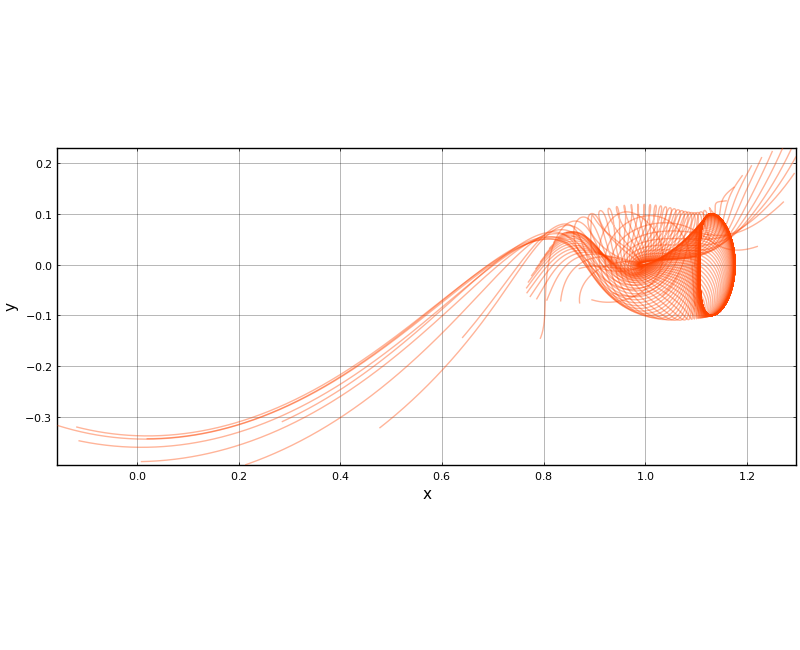

In [94]:
plot(outsim, linealpha=0.4, vars=(1,2), flip=false, aspect_ratio=:equal, size=(800,650), c=:orangered,
     frame_style=:box, gridalpha=0.4, xlabel="x", ylabel="y")

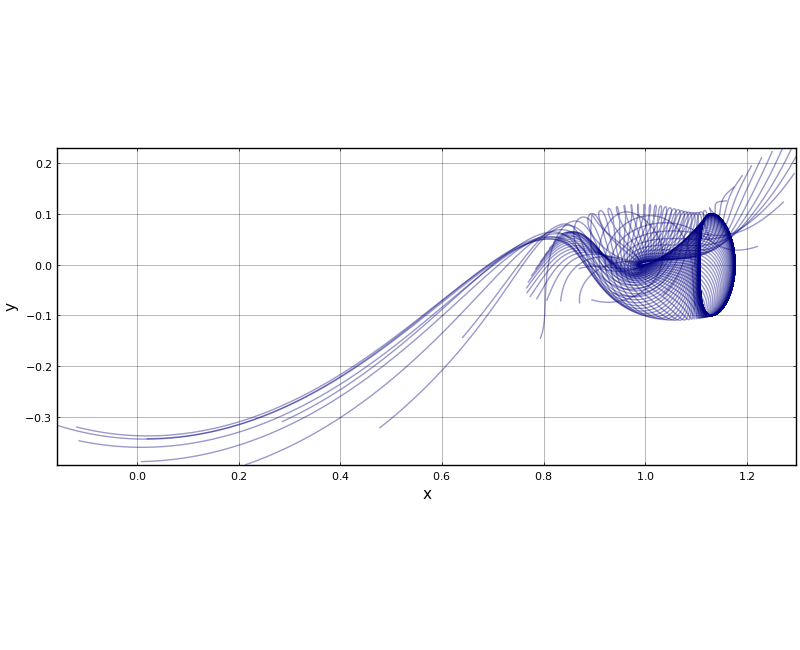

In [93]:
plot(outsim2, linealpha=0.4, vars=(1,2), flip=false, aspect_ratio=:equal, size=(800,650), c=:navy,
     frame_style=:box, gridalpha=0.4, xlabel="x", ylabel="y")

In [47]:
R3BP.get_manifold_ps(outsim)

Main.R3BP.Struct_out_PoincareSection([0.7730932318964241 -0.06364918262115406 … 0.21383113888395774 -0.11842625039993147; 0.7667018794478344 -0.05637417825492667 … 0.22402311599800906 -0.11940650975673765; … ; 0.8061087511595715 -0.0709058853718688 … 0.17066946360240515 -0.11185665070130685; 0.7860249898835897 -0.06837933953824865 … 0.1958520831079553 -0.11626568141161017], [-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0  …  -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0])